In [1]:
#Import Numpy library and modules
import numpy as np
from numpy import random
from numpy.linalg import norm

In [2]:
#Define the last digit of my student number as the seed to get random integers
np.random.seed(7)
# Define X(3x4),Y(4x3) matrices with random integers
X = np.random.randint(10,size=(3,4))
print("X =",X)
print("------------")
Y = np.random.randint(10,size=(4,3))
print("Y =",Y)

X = [[4 9 6 3]
 [3 7 7 9]
 [7 8 9 8]]
------------
Y = [[7 6 4]
 [0 7 0]
 [7 6 3]
 [5 8 8]]


In [3]:
#Define two integer vectors g and z
np.random.seed(7)
g = random.choice([0,1,2,3,4,5,6,7,8,9,10], size=(4, 1))
print("g =",g)

z = random.choice([0,1,2,3,4,5,6,7,8,9,10], size=(4, 1))
print("z =",z)

#Transpose g
np.transpose(g)


g = [[4]
 [9]
 [6]
 [3]]
z = [[3]
 [7]
 [7]
 [9]]


array([[4, 9, 6, 3]])

In [4]:
#Compute the inner product of vectors g and z
gz = np.vdot(g,z)
print("The inner product of g and z:",gz)

#Compute the matrix-vector product Xg
Xg = np.dot(X,g)
print("The inner product of X and g:",Xg)
dimensions_Xg = Xg.shape
print(dimensions_Xg)

#Compute the dot product of X and Y
XY = X.dot(Y)
print("The inner product of X and Y:",XY)
dimensions_XY = XY.shape
print(dimensions_XY)

The inner product of g and z: 144
The inner product of X and g: [[142]
 [144]
 [178]]
(3, 1)
The inner product of X and Y: [[ 85 147  58]
 [115 181 105]
 [152 216 119]]
(3, 3)


In [5]:
X_norm = norm(X)
print("Frobenius norm of X:",X_norm)
Y_norm = norm(Y)
print("Frobenius norm of Y:",Y_norm)
g_norm = norm(g)
print("Frobenius norm of g:",g_norm)
z_norm = norm(z)
print("Frobenius norm of z:",z_norm)
Xg_norm = norm(Xg)
print("Frobenius norm of Xg:",Xg_norm)
XY_norm = norm(XY)
print("Frobenius norm of XY:",XY_norm)

Frobenius norm of X: 24.24871130596428
Frobenius norm of Y: 19.924858845171276
Frobenius norm of g: 11.916375287812984
Frobenius norm of z: 13.711309200802088
Frobenius norm of Xg: 269.41417928535236
Frobenius norm of XY: 416.0889328016308


In [6]:
# ---------------------------LINEAR REGRESSION---------------------------------
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.util.testing as tm
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.formula.api as smf

<ipython-input-6-2c2ae6cb72cf>:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
# Load the Boston Housing Dataset
filename = "HousingData.csv"
dataframe = pd.read_csv(filename,header=0,names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])

In [8]:
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
# I noticed some NaN values. Let's check to be sure
dataframe.isna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Data cleaning
# Drop NaN values to avoid ValueError
dataframe.dropna(inplace=True)

In [11]:
# Check that NaN values are gone
dataframe 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [12]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435972,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


'RM has a strong positive correlation with MEDV (0,7) while LSTAT has a strong negative correlation with MEDV (-0,7).'

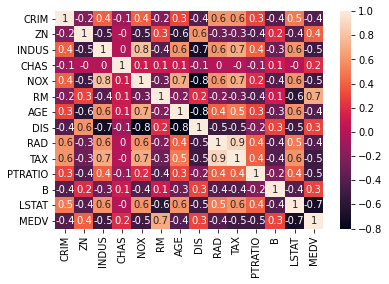

In [13]:
correlation_matrix = dataframe.corr().round(1)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
# If the value is close to 1,strong positive correlation
# If the value is close to -1,strong negative correlation
'''RM has a strong positive correlation with MEDV (0,7) while LSTAT has a strong negative correlation with MEDV (-0,7).'''

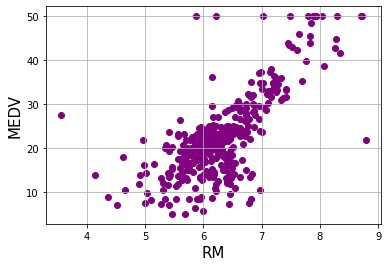

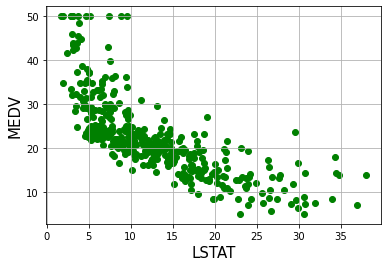

'The higher the median value of owner occupied homes, the higher the average number of rooms per dwelling.Linear relationship, thus good predictions.There are a few outliers.The lower the median value of owner occupied home, the higher the percentage of lower status population.Not a linear relationship though.'

In [14]:
# Check correlation between input and target variables
plt.scatter(dataframe["RM"], dataframe["MEDV"], color='purple')
plt.xlabel("RM", fontsize=15)
plt.ylabel("MEDV", fontsize=15)
plt.grid(True)
plt.show()

plt.scatter(dataframe["LSTAT"], dataframe["MEDV"], color='green')
plt.xlabel("LSTAT", fontsize=15)
plt.ylabel("MEDV", fontsize=15)
plt.grid(True)
plt.show()

# --------------------------Observations------------------------------------------------------------------------------
'''The higher the median value of owner occupied homes, the higher the average number of rooms per dwelling.Linear relationship, thus good predictions.There are a few outliers.The lower the median value of owner occupied home, the higher the percentage of lower status population.Not a linear relationship though.'''

In [15]:
# Prepare the data for training
#features = ["RM","LSTAT"]
#target = ["MEDV"]

X = pd.DataFrame(np.c_[dataframe["RM"], dataframe["LSTAT"]], columns = ["RM","LSTAT"])
y = dataframe["MEDV"]
print(y)
print(X)

#X = dataframe[features].values.reshape((-1, 1))
#y = dataframe[target].values
#df = pd.DataFrame(np.c_[dataframe["RM"], dataframe["LSTAT"]], columns = ["RM","LSTAT"])
#y = dataframe["MEDV"]

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64
        RM  LSTAT
0    6.575   4.98
1    6.421   9.14
2    7.185   4.03
3    6.998   2.94
4    6.430   5.21
..     ...    ...
389  5.569  15.10
390  6.027  14.33
391  6.120   9.08
392  6.976   5.64
393  6.794   6.48

[394 rows x 2 columns]


In [16]:
model = smf.ols(formula="MEDV ~ RM + LSTAT", data=dataframe)
results_formula = model.fit()
results_formula.params

Intercept   -4.731820
RM           5.522704
LSTAT       -0.594497
dtype: float64

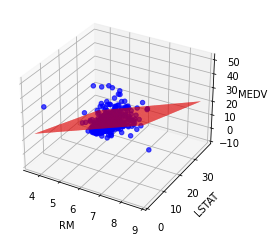

In [17]:
x_surf, y_surf = np.meshgrid(np.linspace(dataframe.RM.min(), dataframe.RM.max(), 100),np.linspace(dataframe.LSTAT.min(), dataframe.LSTAT.max(), 100))
onlyX = pd.DataFrame({"RM": x_surf.ravel(), "LSTAT": y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(dataframe["RM"],dataframe["LSTAT"],dataframe["MEDV"],color="blue", marker="o", alpha=0.7)
ax.plot_surface(x_surf,y_surf,fittedY.values.reshape(x_surf.shape), color="red", alpha=0.9)
ax.set_xlabel("RM")
ax.set_ylabel("LSTAT")
ax.set_zlabel("MEDV")
plt.show()

In [18]:
# Split the data into train and test sets, 80% training 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20,train_size = 0.80, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(315, 2)
(79, 2)
(315,)
(79,)


In [19]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, Y_train)

# Extracting data from the model
# The beta coefficients
print("Regression coefficients:",regr.coef_)

# The bias term (y-intercept)
print("Bias:",regr.intercept_)
print("-------------------------------")

# Model evaluation for train set (predicted values of y given the X_train data)
y_train_predict = regr.predict(X_train)

# MAE,RMSE and R-squared for train set
r2 = metrics.r2_score(Y_train, y_train_predict)
rmse = metrics.mean_squared_error(Y_train, y_train_predict)

print("Model performance for train set")
print("R2 score: {}".format(r2))
print("RMSE: {}".format(rmse))

# Model evaluation for test set (predicted values of y given the X_test data)
y_test_predict = regr.predict(X_test)

# MAE,RMSE and R-squared for test set, 1 is perfect prediction
r_squared = metrics.r2_score(Y_test, y_test_predict)
rmse = metrics.mean_squared_error(Y_test, y_test_predict)

print("-------------------------------")
print("Model performance for test set")
print('R2 score: {}'.format(r_squared))
print('RMSE: {}'.format(rmse))

'''Both RM and LSTAT seem to be statistically significant in predicting the median house value.It also seems that the produced statitics of the train set are different from the test set.The R2 score is higher in the test set than in the train set,which means that the model explains well enough the variance of the train data and that it generalizes well,it has a good predictive quality based on the test set.The model could produce R2 score closer to 1 in both train and test set though, so that the model could explain greater amount of variability as well as produce better prediction results.The RMSE produces a good score for a moderately working algorithm. The score produced in the train set is higher than in the test set due to the fact that the ratio allocated in the train set was greater(80%) than in the test set(20%).However,the lower RMSE in the test set denotes a greater fit to the data.'''

Regression coefficients: [ 5.68535595 -0.56823985]
Bias: -5.912812981620487
-------------------------------
Model performance for train set
R2 score: 0.6479023967476796
RMSE: 29.4560241861146
-------------------------------
Model performance for test set
R2 score: 0.6900038035365308
RMSE: 24.81821204172385


'Both RM and LSTAT seem to be statistically significant in predicting the median house value.It also seems that the produced statitics of the train set are different from the test set.The R2 score is higher in the test set than in the train set,which means that the model explains well enough the variance of the train data and that it generalizes well,it has a good predictive quality based on the test set.The model could produce R2 score closer to 1 in both train and test set though, so that the model could explain greater amount of variability as well as produce better prediction results.The RMSE produces a good score for a moderately working algorithm. The score produced in the train set is higher than in the test set due to the fact that the ratio allocated in the train set was greater(80%) than in the test set(20%).However,the lower RMSE in the test set denotes a greater fit to the data.'

In [20]:
#----------- First additional different ratios for train_test_split ------------

# Split the data into train and test sets, 90% training 10% test
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, y, test_size = 0.9,train_size = 0.1, random_state=5)
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X1_train, Y1_train)

# The coefficients
print("Regression coefficients:",regr.coef_)

# The bias term
print("Bias:",regr.intercept_)
print("-----------------------------------")

# Model evaluation for train set
y1_train_predict = regr.predict(X1_train)

# RMSE and R-squared for train set
r2 = metrics.r2_score(Y1_train, y1_train_predict)
rmse = metrics.mean_squared_error(Y1_train, y1_train_predict)

print("Model performance for train set 1")
print("R2 score: {}".format(r2))
print("RMSE: {}".format(rmse))

# Model evaluation for test set
y1_test_predict = regr.predict(X1_test)

# RMSE and R-squared for test set
r_squared = metrics.r2_score(Y1_test, y1_test_predict)
rmse = metrics.mean_squared_error(Y1_test, y1_test_predict)

print("-----------------------------------")
print("Model performance for test set 1")
print('R2 score: {}'.format(r_squared))
print('RMSE: {}'.format(rmse))

'''It seems that the produced statitics of the train set are different from the test set.The R2 score is higher in the train set than in the test set,which means that the model explains well the variance of the train data, but it could have a greater predictive quality closer to 1 based on the test set.Although a lower ratio was allocated to the test set(10%),the RMSE score was higher than the RMSE score in the train set which means that the model was not a good fit to the data.'''

(39, 2)
(355, 2)
(39,)
(355,)
Regression coefficients: [ 8.73128269 -0.4968731 ]
Bias: -24.761875850670855
-----------------------------------
Model performance for train set 1
R2 score: 0.7583498403403984
RMSE: 18.509223371158438
-----------------------------------
Model performance for test set 1
R2 score: 0.5769595610354581
RMSE: 35.505314392718


'It seems that the produced statitics of the train set are different from the test set.The R2 score is higher in the train set than in the test set,which means that the model explains well the variance of the train data, but it could have a greater predictive quality closer to 1 based on the test set.Although a lower ratio was allocated to the test set(10%),the RMSE score was higher than the RMSE score in the train set which means that the model was not a good fit to the data.'

In [21]:
#----------- Second additional different ratios for train_test_split ----------

# Split the data into train and test sets, 60% training 40% test
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, y, test_size = 0.6,train_size = 0.4, random_state=5)
print(X2_train.shape)
print(X2_test.shape)
print(Y2_train.shape)
print(Y2_test.shape)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X2_train, Y2_train)

# The coefficients
print("Regression coefficients:",regr.coef_)

# The bias term
print("Bias:",regr.intercept_)
print("-----------------------------------")

# Model evaluation for train set
y2_train_predict = regr.predict(X2_train)

# RMSE and R-squared for train set
r2 = metrics.r2_score(Y2_train, y2_train_predict)
rmse = metrics.mean_squared_error(Y2_train, y2_train_predict)

print("Model performance for train set 2")
print("R2 score: {}".format(r2))
print("RMSE: {}".format(rmse))

# Model evaluation for test set
y2_test_predict = regr.predict(X2_test)

# RMSE and R-squared for test set
r_squared = metrics.r2_score(Y2_test, y2_test_predict)
rmse = metrics.mean_squared_error(Y2_test, y2_test_predict)

print("-----------------------------------")
print("Model performance for test set 2")
print('R2 score: {}'.format(r_squared))
print('RMSE: {}'.format(rmse))

'''It seems that the produced statitics of the train set are different from the test set.The R2 score is a little higher in the train set than in the test set,which means that the model explains well the variance of the train data and has a relatively good predictive quality close to 1 based on the test set.Although a bigger ratio(60%) was allocated in the train set,the RMSE score is lower than the RMSE score in the test set, which means that the model is a good fit to the train data, but not as good as in the test data.'''

(157, 2)
(237, 2)
(157,)
(237,)
Regression coefficients: [ 6.80221551 -0.50086316]
Bias: -13.565771860200051
-----------------------------------
Model performance for train set 2
R2 score: 0.6670878704353101
RMSE: 27.564521415162137
-----------------------------------
Model performance for test set 2
R2 score: 0.6386801238342891
RMSE: 30.146921899405037


'It seems that the produced statitics of the train set are different from the test set.The R2 score is a little higher in the train set than in the test set,which means that the model explains well the variance of the train data and has a relatively good predictive quality close to 1 based on the test set.Although a bigger ratio(60%) was allocated in the train set,the RMSE score is lower than the RMSE score in the test set, which means that the model is a good fit to the train data, but not as good as in the test data.'

In [22]:
#----------- Third additional different ratios for train_test_split -----------

# Split the data into train and test sets, 50% training 50% test
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X, y, test_size = 0.5,train_size = 0.5, random_state=5)
print(X3_train.shape)
print(X3_test.shape)
print(Y3_train.shape)
print(Y3_test.shape)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X3_train, Y3_train)

# The coefficients
print("Regression coefficients:",regr.coef_)

# The bias term
print("Bias:",regr.intercept_)
print("-----------------------------------")

# Model evaluation for train set
y3_train_predict = regr.predict(X3_train)

# RMSE and R-squared for train set
r2 = metrics.r2_score(Y3_train, y3_train_predict)
rmse = metrics.mean_squared_error(Y3_train, y3_train_predict)

print("Model performance for train set 3")
print("R2 score: {}".format(r2))
print("RMSE: {}".format(rmse))

# Model evaluation for test set
y3_test_predict = regr.predict(X3_test)

# RMSE and R-squared for test set
r_squared = metrics.r2_score(Y3_test, y3_test_predict)
rmse = metrics.mean_squared_error(Y3_test, y3_test_predict)

print("-----------------------------------")
print("Model performance for test set 3")
print('R2 score: {}'.format(r_squared))
print('RMSE: {}'.format(rmse))

'''It seems that the produced statitics of the train set are different from the test set.The R2 score is higher in the test set than in the train set,which means that the model explains well enough the variance of the train data and generalizes well.It has a relatively good predictive quality based on the test set,but it could score closer to 1.The RMSE produces a good score for a moderately working algorithm.Even though the ratio allocated in the sets was split 50-50,the score produced in the train set is a little higher than in the test set and not exactly the same.In general,the RMSE could be lower to prove a greater fit to the data.'''

(197, 2)
(197, 2)
(197,)
(197,)
Regression coefficients: [ 5.82791421 -0.51263231]
Bias: -7.495732101076179
-----------------------------------
Model performance for train set 3
R2 score: 0.6479117375505065
RMSE: 29.479249468448543
-----------------------------------
Model performance for test set 3
R2 score: 0.6611417777353373
RMSE: 28.026958237335503


'It seems that the produced statitics of the train set are different from the test set.The R2 score is higher in the test set than in the train set,which means that the model explains well enough the variance of the train data and generalizes well.It has a relatively good predictive quality based on the test set,but it could score closer to 1.The RMSE produces a good score for a moderately working algorithm.Even though the ratio allocated in the sets was split 50-50,the score produced in the train set is a little higher than in the test set and not exactly the same.In general,the RMSE could be lower to prove a greater fit to the data.'

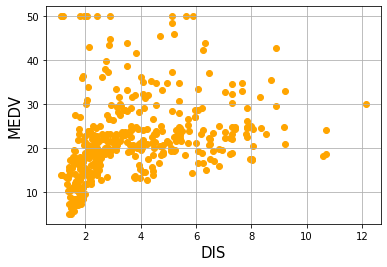

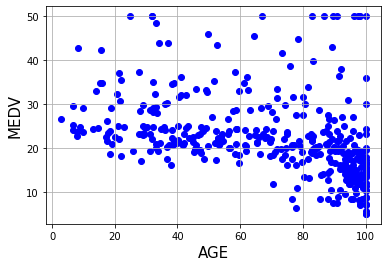

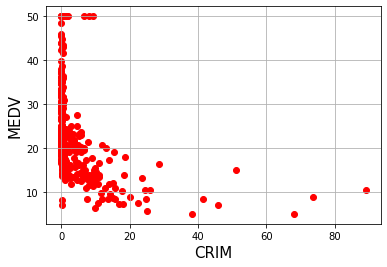

'The higher the median value of owner occupied homes, the higher the weighted distances to 5 Boston employment centers(DIS). A positive correlation, but not perfect linear relationship.There are many outliers.The higher the median value of owner occupied home, the lower proportion of owner-occupied units built prior to 1940(AGE).A negative correlation and not perfect linear relationship with many outliers.The higher the median value of owner occupied homes, the lower the per capita crime rate by town(CRIM). A negative correlation and not good linear relationship.There are a few outliers.'

In [23]:
#----------------------------------BONUS---------------------------------------

# First combination features = "DIS" and "AGE"
X_1 = pd.DataFrame(np.c_[dataframe["DIS"], dataframe["AGE"]], columns = ["DIS","AGE"])
y_1 = dataframe["MEDV"]

# Second combination features = "DIS" and "CRIM"
X_2 = pd.DataFrame(np.c_[dataframe["DIS"], dataframe["CRIM"]], columns = ["DIS","CRIM"])

# Third combination features = "AGE" and "CRIM"
X_3 = pd.DataFrame(np.c_[dataframe["AGE"], dataframe["CRIM"]], columns = ["AGE","CRIM"])

# Check correlation between input and target variables
plt.scatter(dataframe["DIS"], dataframe["MEDV"], color='orange')
plt.xlabel("DIS", fontsize=15)
plt.ylabel("MEDV", fontsize=15)
plt.grid(True)
plt.show()

plt.scatter(dataframe["AGE"], dataframe["MEDV"], color='blue')
plt.xlabel("AGE", fontsize=15)
plt.ylabel("MEDV", fontsize=15)
plt.grid(True)
plt.show()

plt.scatter(dataframe["CRIM"], dataframe["MEDV"], color='red')
plt.xlabel("CRIM", fontsize=15)
plt.ylabel("MEDV", fontsize=15)
plt.grid(True)
plt.show()

# --------------------------Observations------------------------------------------------------------------------------
'''The higher the median value of owner occupied homes, the higher the weighted distances to 5 Boston employment centers(DIS). A positive correlation, but not perfect linear relationship.There are many outliers.The higher the median value of owner occupied home, the lower proportion of owner-occupied units built prior to 1940(AGE).A negative correlation and not perfect linear relationship with many outliers.The higher the median value of owner occupied homes, the lower the per capita crime rate by town(CRIM). A negative correlation and not good linear relationship.There are a few outliers.'''

In [24]:
# Split the data into train and test sets, 80% training 20% test
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, y, test_size = 0.8,train_size = 0.2, random_state=5)
print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

# Create linear regression object
regr_1 = linear_model.LinearRegression()

# Train the model using the train data
regr_1.fit(X_train_1, Y_train_1)

# The coefficients
print("Regression coefficients:",regr_1.coef_)

# The bias term
print("Bias:",regr_1.intercept_)
print("----------------------------------------")

# Model evaluation for train set
y_train_1_predict = regr_1.predict(X_train_1)

# RMSE and R-squared for train set
r2 = metrics.r2_score(Y_train_1, y_train_1_predict)
rmse = metrics.mean_squared_error(Y_train_1, y_train_1_predict)

print("Model performance for bonus train set 1")
print("R2 score: {}".format(r2))
print("RMSE: {}".format(rmse))

# Model evaluation for test set
y_test_1_predict = regr_1.predict(X_test_1)

# RMSE and R-squared for test set
r_squared = metrics.r2_score(Y_test_1, y_test_1_predict)
rmse = metrics.mean_squared_error(Y_test_1, y_test_1_predict)

print("----------------------------------------")
print("Model performance for bonus test set 1")
print('R2 score: {}'.format(r_squared))
print('RMSE: {}'.format(rmse))

'''Τhis model explains only 7% of the variance in the dependent variables in the train set and 11.9% of the variance in the test set, which proves that the DIS and AGE variables are not at all significant in predicting the median house value.The R2 score is very low, especially in the train set, while the RMSE is very high, above 60%, which proves that the model based on these variables is not a good fit to the data.'''

(78, 2)
(316, 2)
(78,)
(316,)
Regression coefficients: [-0.81547822 -0.11083774]
Bias: 33.751737196503775
----------------------------------------
Model performance for bonus train set 1
R2 score: 0.0705532258644852
RMSE: 66.91614227383555
----------------------------------------
Model performance for bonus test set 1
R2 score: 0.11920355847007513
RMSE: 75.81682590829486


'Τhis model explains only 7% of the variance in the dependent variables in the train set and 11.9% of the variance in the test set, which proves that the DIS and AGE variables are not at all significant in predicting the median house value.The R2 score is very low, especially in the train set, while the RMSE is very high, above 60%, which proves that the model based on these variables is not a good fit to the data.'

In [25]:
# Split the data into train and test sets, 80% training 20% test
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, y_1, test_size = 0.8,train_size = 0.2, random_state=5)
print(X_train_2.shape)
print(X_test_2.shape)
print(Y_train_2.shape)
print(Y_test_2.shape)

# Create linear regression object
regr_2 = linear_model.LinearRegression()

# Train the model using the train data
regr_2.fit(X_train_2, Y_train_2)

# The coefficients
print("Regression coefficients:",regr_2.coef_)

# The bias term
print("Bias:",regr_2.intercept_)
print("---------------------------------------")

# Model evaluation for train set
y_train_2_predict = regr_2.predict(X_train_2)

# RMSE and R-squared for train set
r2 = metrics.r2_score(Y_train_2, y_train_2_predict)
rmse = metrics.mean_squared_error(Y_train_2, y_train_2_predict)

print("Model performance for bonus train set 2")
print("R2 score: {}".format(r2))
print("RMSE: {}".format(rmse))

# Model evaluation for test set
y_test_2_predict = regr_2.predict(X_test_2)

# RMSE and R-squared for test set
r_squared = metrics.r2_score(Y_test_2, y_test_2_predict)
rmse = metrics.mean_squared_error(Y_test_2, y_test_2_predict)

print("---------------------------------------")
print("Model performance for bonus test set 2")
print('R2 score: {}'.format(r_squared))
print('RMSE: {}'.format(rmse))

'''Τhis model explains only 15.2% of the variance in the dependent variables in the train set and a negative 0.33% of the variance in the test set, which proves that the DIS and CRIM variables are not that significant in statistically predicting the median house value.The R2 score is low,below 0 in the test data,while the RMSE is above 60% which proves that the model based on these variables is not a good fit to the data.'''

(78, 2)
(316, 2)
(78,)
(316,)
Regression coefficients: [-0.51266674 -0.72950863]
Bias: 26.4798418045113
---------------------------------------
Model performance for bonus train set 2
R2 score: 0.1523762062160644
RMSE: 61.02524206648573
---------------------------------------
Model performance for bonus test set 2
R2 score: -0.0033496592710242634
RMSE: 86.36591027770828


'Τhis model explains only 15.2% of the variance in the dependent variables in the train set and a negative 0.33% of the variance in the test set, which proves that the DIS and CRIM variables are not that significant in statistically predicting the median house value.The R2 score is low,below 0 in the test data,while the RMSE is above 60% which proves that the model based on these variables is not a good fit to the data.'

In [26]:
# Split the data into train and test sets, 80% training 20% test
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, y_1, test_size = 0.8,train_size = 0.2, random_state=5)
print(X_train_3.shape)
print(X_test_3.shape)
print(Y_train_3.shape)
print(Y_test_3.shape)

# Create linear regression object
regr_3 = linear_model.LinearRegression()

# Train the model using the train data
regr_3.fit(X_train_3, Y_train_3)

# The coefficients
print("Regression coefficients:",regr_3.coef_)

# The bias term
print("Bias:",regr_3.intercept_)
print("---------------------------------------")

# Model evaluation for train set
y_train_3_predict = regr_3.predict(X_train_3)

# RMSE and R-squared for train set
r2 = metrics.r2_score(Y_train_3, y_train_3_predict)
rmse = metrics.mean_squared_error(Y_train_3, y_train_3_predict)

print("Model performance for bonus train set 3")
print("R2 score: {}".format(r2))
print("RMSE: {}".format(rmse))

# Model evaluation for test set
y_test_3_predict = regr_3.predict(X_test_3)

# RMSE and R-squared for test set
r_squared = metrics.r2_score(Y_test_3, y_test_3_predict)
rmse = metrics.mean_squared_error(Y_test_3, y_test_3_predict)

print("---------------------------------------")
print("Model performance for bonus test set 3")
print('R2 score: {}'.format(r_squared))
print('RMSE: {}'.format(rmse))

'''Τhis model explains only 14.9% of the variance in the dependent variables in the train set and 15% of the variance in the test set, which proves that the AGE and CRIM variables are not very significant in statistically predicting the median house value.The R2 score is low,while the RMSE is above 60% which proves that the model based on these variables is not a good fit to the data.'''

(78, 2)
(316, 2)
(78,)
(316,)
Regression coefficients: [-0.03417258 -0.5876742 ]
Bias: 26.642190943528142
---------------------------------------
Model performance for bonus train set 3
R2 score: 0.1498394233020951
RMSE: 61.207879449402995
---------------------------------------
Model performance for bonus test set 3
R2 score: 0.1505252111097426
RMSE: 73.12073385640494


'Τhis model explains only 14.9% of the variance in the dependent variables in the train set and 15% of the variance in the test set, which proves that the AGE and CRIM variables are not very significant in statistically predicting the median house value.The R2 score is low,while the RMSE is above 60% which proves that the model based on these variables is not a good fit to the data.'

In [27]:
'''After further investigation, it has become evident that the model performance changes according to the different features selected.Every feature has a different influence on the target variable.Some features play a more crucial role than others, they have a higher level of significance resulting in a better and more satisfying model performance.The results have also shown that a diffent combination of features trained and tested has an impact on the model in various ways.The feature selection is an important part during the development of a model and one has to be careful and carry out experiments in order to find the better-suited features and obtain good results.'''    

'After further investigation, it has become evident that the model performance changes according to the different features selected.Every feature has a different influence on the target variable.Some features play a more crucial role than others, they have a higher level of significance resulting in a better and more satisfying model performance.The results have also shown that a diffent combination of features trained and tested has an impact on the model in various ways.The feature selection is an important part during the development of a model and one has to be careful and carry out experiments in order to find the better-suited features and obtain good results.'